In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

import scipy.stats as stats
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from statannotations.Annotator import Annotator

In [2]:
# Load dataset iris
data = load_iris(as_frame=True)
df = data.frame
df['species'] = data.target_names[data.target]
df = df.drop(columns=['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


> **Uji Homogenitas Varians**

In [3]:
# Kolom yang akan diuji
kolom_uji = data.feature_names  

# Simpan hasil 
hasil = []

for kolom in kolom_uji:
    # Ambil nilai masing-masing group berdasarkan species
    group_data = [df[df['species'] == species][kolom] for species in df['species'].unique()]
    
    # Uji Levene
    stat, p = stats.levene(*group_data)
    
    # Simpan
    hasil.append({'Feature': kolom, 'Statistic': stat, 'p-value': p})

# Ubah ke DataFrame 
df_hasil = pd.DataFrame(hasil)
df_hasil

,Feature,Statistic,p-value
0,sepal length (cm),6.352720,2.258528e-03
1,sepal width (cm),0.590212,5.555179e-01
2,petal length (cm),19.480339,3.128757e-08
3,petal width (cm),19.892439,2.260520e-08


> **Uji ANOVA**

In [6]:
# Anaova Normal (varians sama)
anova_results = pg.anova(data=df, dv='sepal width (cm)', between='species', detailed=True)
anova_results

,Source,SS,DF,MS,F,p-unc,np2
0,species,11.344933,2,5.672467,49.16004,4.492017e-17,0.400783
1,Within,16.962000,147,0.115388,NaN,NaN,NaN


In [7]:
# ANOVA Welch (varians tidak sama)
welch_res = pg.welch_anova(dv='sepal length (cm)', between='species', data=df)
welch_res

,Source,ddof1,ddof2,F,p-unc,np2
0,species,2,92.211145,138.908285,1.505059e-28,0.618706


> **Plot**

**Sepal Width (cm)**

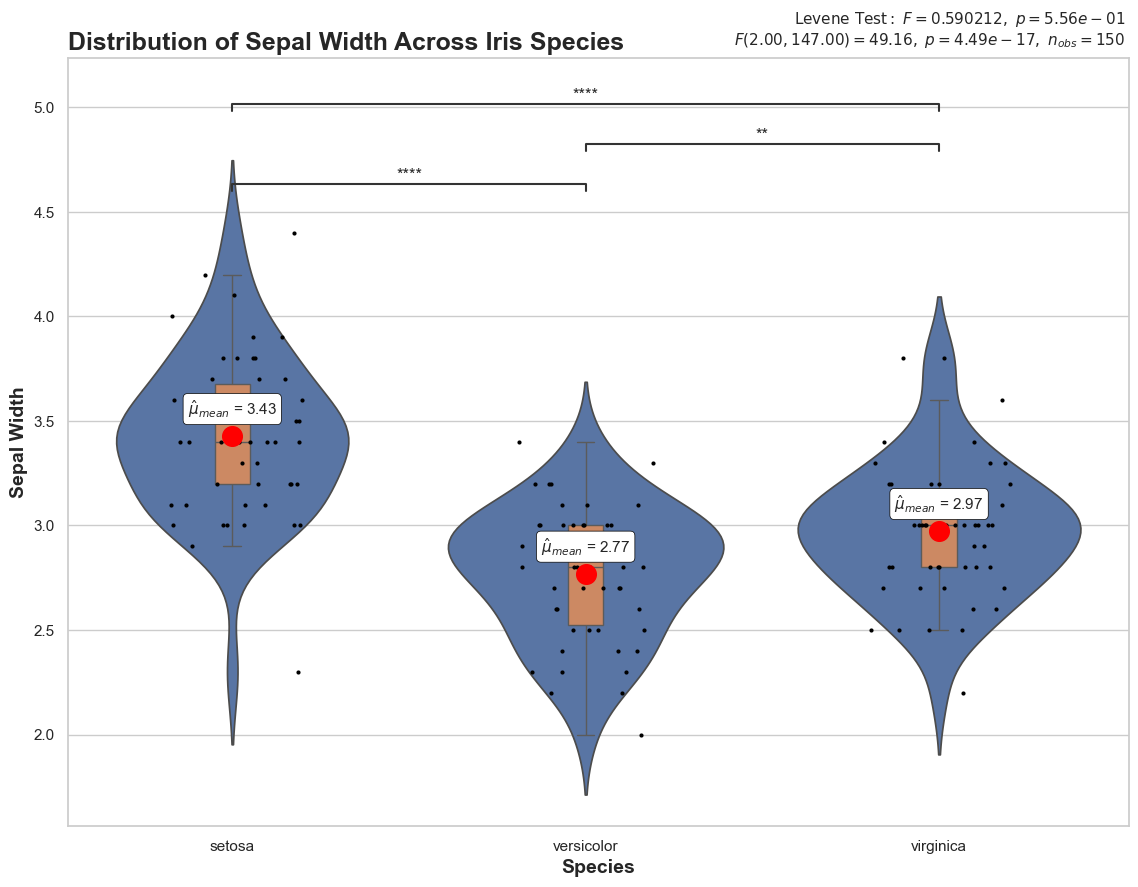

In [14]:
fig, ax = plt.subplots(figsize=(12, 9))

# Plot distribusi sepal width untuk setiap species
sns.violinplot(data=df, x='species', y='sepal width (cm)', inner=None, ax=ax)
sns.boxplot(data=df, x='species', y='sepal width (cm)', width=0.1, showcaps=True, boxprops={'zorder': 2}, showfliers=False, ax=ax)
sns.stripplot(data=df, x='species', y='sepal width (cm)', color='black', size=3, jitter=0.2, ax=ax)

# Tambah mean 
species_order = df['species'].unique()
for i, specie in enumerate(species_order):
    mean_val = df[df['species'] == specie]['sepal width (cm)'].mean()
    plt.scatter(i, mean_val, color='red', s=200, zorder=3)
    plt.text(i, mean_val + 0.1, f"$\\hat{{\\mu}}_{{mean}}$ = {mean_val:.2f}", 
             ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5))

# Anotasi 
pairs = [
    ("setosa", "versicolor"),
    ("setosa", "virginica"),
    ("versicolor", "virginica")
]
annotator = Annotator(ax, pairs, data=df, x='species', y='sepal width (cm)')
annotator.configure(
    verbose=0,
    line_height=0.01, 
    test='t-test_welch',              
    text_format='star',            
    loc='inside',                 
)
annotator.apply_and_annotate()

# Anova
text_top = (
    f"$F({anova_results.loc[0, 'DF']:.2f}, {anova_results.loc[1, 'DF']:.2f}) = {anova_results.loc[0, 'F']:.2f},\\ "
    f"p = {anova_results.loc[0, 'p-unc']:.2e},\\ "
    f"n_{{obs}} = {len(df)}$"
)
plt.text(1.42, 5.3, text_top, fontsize=11)
# Levene
text_levene = (
    rf"$\mathrm{{Levene\ Test :}}\ F = {df_hasil.loc[1, 'Statistic']:.6f},\ p = {df_hasil.loc[1, 'p-value']:.2e}$"
)
plt.text(1.59, 5.4, text_levene, fontsize=11)

# Label 
plt.xlabel("Species", fontweight='bold', fontsize=14)
plt.ylabel("Sepal Width", fontweight='bold', fontsize=14)
plt.title("Distribution of Sepal Width Across Iris Species", fontsize=18, loc='left', fontweight='bold')
plt.tight_layout()
plt.show()

**Sepal Length (cm)**

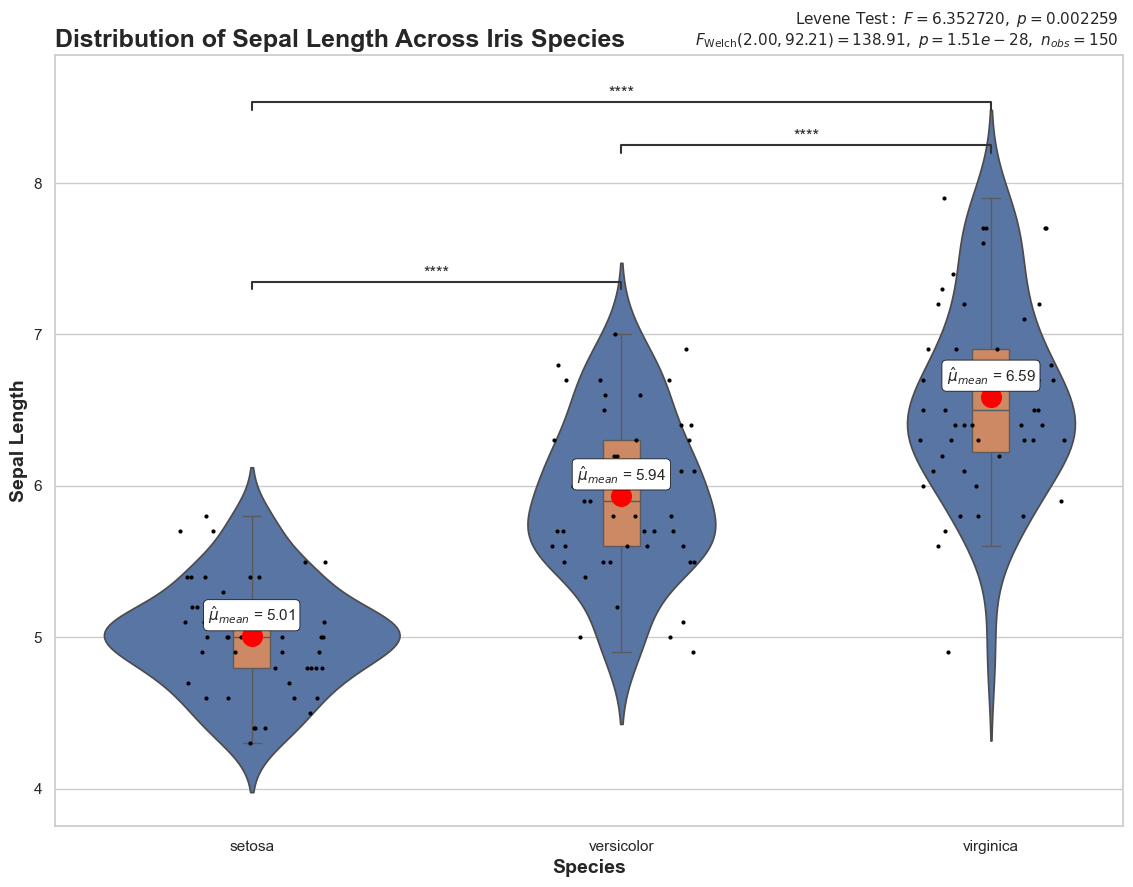

In [17]:
fig, ax = plt.subplots(figsize=(12, 9))

# Plot distribusi sepal length untuk setiap species
sns.violinplot(data=df, x='species', y='sepal length (cm)', inner=None, ax=ax)
sns.boxplot(data=df, x='species', y='sepal length (cm)', width=0.1, showcaps=True, boxprops={'zorder': 2}, showfliers=False, ax=ax)
sns.stripplot(data=df, x='species', y='sepal length (cm)', color='black', size=3, jitter=0.2, ax=ax)

# Tambah mean 
species_order = df['species'].unique()
for i, specie in enumerate(species_order):
    mean_val = df[df['species'] == specie]['sepal length (cm)'].mean()
    plt.scatter(i, mean_val, color='red', s=200, zorder=3)
    plt.text(i, mean_val + 0.1, f"$\\hat{{\\mu}}_{{mean}}$ = {mean_val:.2f}", 
             ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5))

# Anotasi 
pairs = [
    ("setosa", "versicolor"),
    ("setosa", "virginica"),
    ("versicolor", "virginica")
]
annotator = Annotator(ax, pairs, data=df, x='species', y='sepal length (cm)')
annotator.configure(
    verbose=0,
    line_height=0.01, 
    test='t-test_welch',              
    text_format='star',            
    loc='inside',                 
)
annotator.apply_and_annotate()

# Anova
text_top = (
    f"$F_{{\\text{{Welch}}}}({welch_res['ddof1'].values[0]:.2f}, {welch_res['ddof2'].values[0]:.2f}) = {welch_res['F'].values[0]:.2f},\\ "
    f"p = {welch_res['p-unc'].values[0]:.2e},\\ "
    f"n_{{obs}} = {len(df)}$"
)
plt.text(1.2, 8.91, text_top, fontsize=11)
# Levene
text_levene = (
    rf"$\mathrm{{Levene\ Test :}}\ F = {df_hasil.loc[0, 'Statistic']:.6f},\ p = {df_hasil.loc[0, 'p-value']:.6f}$"
)
plt.text(1.47, 9.05, text_levene, fontsize=11)

# Label 
plt.xlabel("Species", fontweight='bold', fontsize=14)
plt.ylabel("Sepal Length", fontweight='bold', fontsize=14)
plt.title("Distribution of Sepal Length Across Iris Species", fontsize=18, loc='left', fontweight='bold')
plt.tight_layout()
plt.show()